# AdaBoost

## O que é?

AdaBoost é um modelo de aprendizado por comitê que agrupa vários aprendizes fracos a fim de obter boa precisão na previsão de valores/classes.
Os modelos AdaBoost utilizam árvores de regressão com apenas a raíz e duas folhas (aprendizes fracos(Stumps)), cada raíz pode se referir a um atributo, por exemplo.
Todas as árvores possuem um peso, sendo esse definido de acordo com a quantidade de erros previstos por essa árvore, quanto mais erros a árvore comete, menor seu peso. 

## Exemplo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

### Classificação

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [23]:
X, Y = make_classification(n_samples = 5000, n_features = 4, random_state = 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [24]:
#Criando modelo
adb_clf = AdaBoostClassifier(n_estimators = 100, learning_rate=1, algorithm='SAMME.R', random_state=0)
adb_clf.fit(X_train, Y_train)

Y_pred = adb_clf.predict(X_test)

print(adb_clf.score(X_test, Y_test))

0.972


### Regressão

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [29]:
X, Y = make_regression (n_samples = 1000, n_features = 4, random_state = 0, shuffle=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [42]:
adb_rg = AdaBoostRegressor(n_estimators = 500, learning_rate=0.99, loss='square', random_state=0)
adb_rg.fit(X_train, Y_train)

Y_pred = adb_rg.predict(X_test)

print(adb_rg.score(X_test, Y_test))

0.8654581774586063


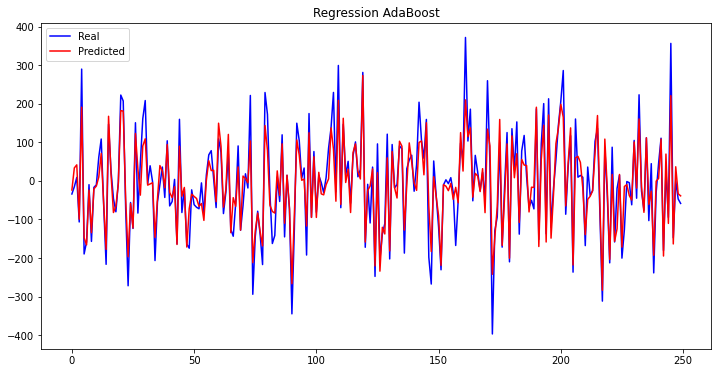

In [44]:
plt.figure(figsize=(12,6))
plt.title('Regression AdaBoost')

plt.plot(Y_test, color='blue', label='Real')
plt.plot(Y_pred, color='red', label='Predicted')

plt.legend()
plt.show()

### AdaBoost e facebook

In [45]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 1, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

In [46]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,10)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9
9,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002,78.449997
10,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002,77.190002
11,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002,76.150002
12,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000,76.150002
13,77.650002,76.739998,76.239998,75.180000,74.050003,76.279999,76.449997,76.720001,77.739998,78.180000


In [47]:
#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4','Close 5','Close 6','Close 7','Close 8','Close 9']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [60]:
adb_fb = AdaBoostRegressor(n_estimators = 50, learning_rate=0.7, loss='square', random_state=0)
adb_fb.fit(X_train, Y_train)

Y_pred = adb_fb.predict(X_test)

print(adb_fb.score(X_test, Y_test))

0.9634516779261523


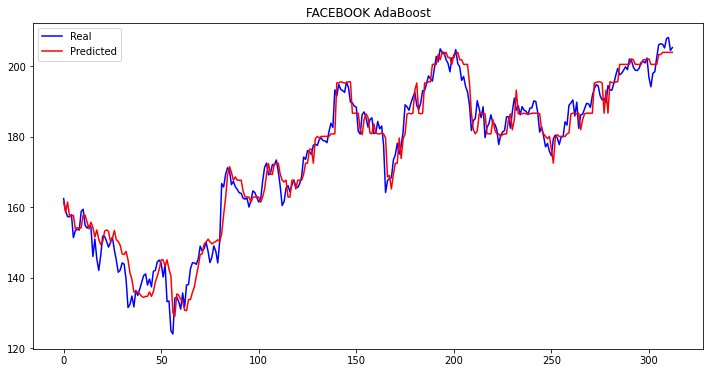

In [61]:
plt.figure(figsize=(12,6))
plt.title('FACEBOOK AdaBoost')

plt.plot(Y_test, color='blue', label='Real')
plt.plot(Y_pred, color='red', label='Predicted')

plt.legend()
plt.show()